# **Convolutional Neural Network in Data Science with Fashion MNIST**
 
## **Written by:** Aarish Asif Khan

## **Date:** 9 March 2024

In [30]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [31]:
# Remove warnings
import warnings
warnings.filterwarnings('ignore')

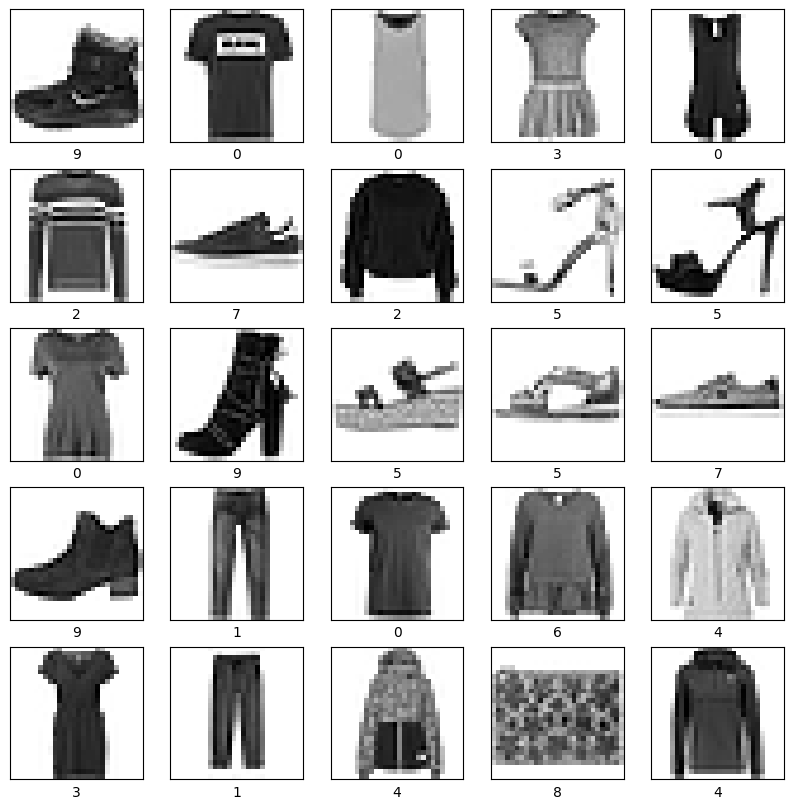

In [32]:
# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

# Display some sample images
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

In [33]:
print(f"We have {len(X_train)} images in the training set and {len(X_test)} images in the test set.")
print(f"The size of the images is {X_train[0].shape}.")

We have 60000 images in the training set and 10000 images in the test set.
The size of the images is (28, 28).


In [34]:
# Check shape of X train
X_train.shape

(60000, 28, 28)

In [35]:
# Check shape of y train
y_train.shape

(60000,)

In [36]:
# X train and X test, y train and y test
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

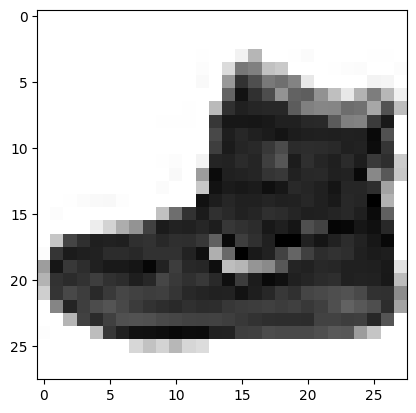

In [53]:
plt.imshow(X_train[0], cmap=plt.cm.binary)

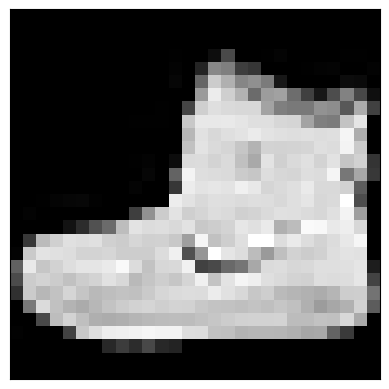

Pixel values:
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0 
  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3 
  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15 
  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66 
  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 232 233 229 223 223 21

In [38]:
# Display the first image in the dataset as a data matrix
plt.imshow(X_train[0], cmap="gray")
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.show()

# Display the values of each pixel in the image
print("Pixel values:")
for row in X_train[0]:
    for pixel in row:
        print("{:3}".format(pixel), end=" ")
    print()

In [39]:
# Change the data type to float32
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0


Pixel values after normalization:
0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 
0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 
0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 
0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.004 0.000 0.000 0.051 0.286 0.000 0.000 0.004 0.016 0.000 0.000 0.000 0.000 0.004 0.004 0.000 
0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.012 0.000 0.141 0.533 0.498 0.243 0.212 0.000 0.000 0.000 0.004 0.012 0.016 0.000 0.000 0.012 
0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.024 0.000 0.400 0.800 0.690 0.525 0.565 0.482 

<Figure size 640x480 with 0 Axes>

<Axes: >

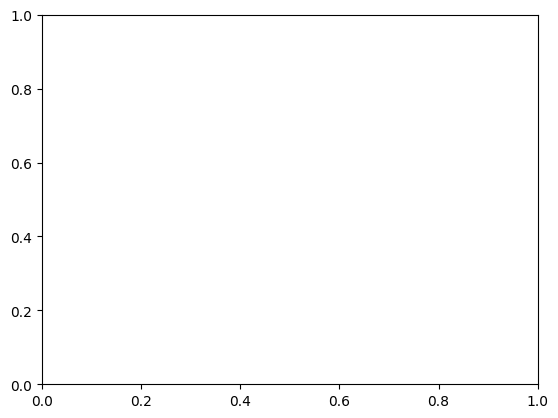

In [40]:
# Display the values of each pixel in the image after normalization
print("\nPixel values after normalization:")
for row in X_train[0]:
    for pixel in row:
        print("{:0.3f}".format(pixel), end=" ")
    print()
    
# Reshape the images to have a channel dimension
x_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
x_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

# Display the complete output of the cell
display(plt.gcf())
display(plt.gca())

# **Building the model**

In [41]:
import tensorflow as tf
from tensorflow.keras import layers

In [42]:
# Create an input layer
input_layer = tf.keras.layers.Input(shape=(28, 28, 1)) # 28x28 pixel images with a single color channel

# CNN model building

model = tf.keras.Sequential([
    input_layer, # Input layer
    layers.Conv2D(filters=10, kernel_size=(3, 3), activation='relu'), # Convolutional layer 

    layers.Conv2D(filters=10, kernel_size=(3, 3),  activation='relu'), # Convolutional layer
    layers.MaxPooling2D(), # Pooling layer
    
    layers.Conv2D(filters=10, kernel_size=(3, 3), activation='relu'), # Convolutional layer
    layers.Conv2D(filters=10, kernel_size=(3, 3), activation='relu'), # Convolutional layer
    layers.MaxPooling2D(), # Pooling layer
    
    layers.Flatten(), # Flatten layer
    layers.Dense(10, activation='softmax') # Output layer
])

In [43]:
# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [44]:
# Train the model
model.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
750/750 [==============================] - 17s 19ms/step - loss: 0.7359 - accuracy: 0.7266 - val_loss: 0.5107 - val_accuracy: 0.8108
Epoch 2/5
750/750 [==============================] - 13s 17ms/step - loss: 0.4775 - accuracy: 0.8259 - val_loss: 0.4672 - val_accuracy: 0.8294
Epoch 3/5
750/750 [==============================] - 13s 17ms/step - loss: 0.4251 - accuracy: 0.8449 - val_loss: 0.4155 - val_accuracy: 0.8505
Epoch 4/5
750/750 [==============================] - 13s 18ms/step - loss: 0.3932 - accuracy: 0.8577 - val_loss: 0.3915 - val_accuracy: 0.8568
Epoch 5/5
750/750 [==============================] - 17s 22ms/step - loss: 0.3732 - accuracy: 0.8651 - val_loss: 0.3706 - val_accuracy: 0.8668


In [45]:
# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_acc)

313/313 [==============================] - 3s 10ms/step - loss: 0.3791 - accuracy: 0.8608
Test Loss: 0.3791452646255493
Test Accuracy: 0.86080002784729


In [46]:
# Grab an image
img = X_test[0]
print(img.shape)

# rehape the image to (28, 28, 1)
img = img.reshape((28, 28, 1))
print(img.shape)

(28, 28)
(28, 28, 1)


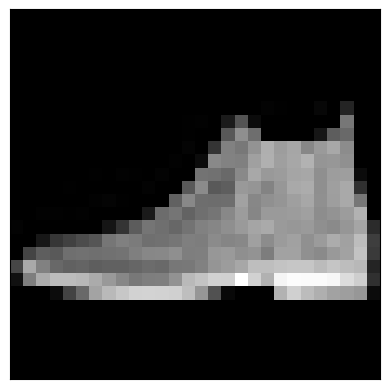

In [47]:
plt.imshow(img, cmap="gray")
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.show()

In [48]:
# Predict the image
predictions = model.predict(img.reshape(1, 28, 28, 1))
print(predictions)

1/1 [==============================] - 0s 454ms/step
[[2.8632465e-07 1.6921161e-11 6.2074477e-08 1.4970082e-08 1.7978564e-08
  4.2033535e-03 7.1673583e-08 8.0349967e-03 1.3160989e-04 9.8762953e-01]]


In [49]:
print(predictions[:,7])

[0.008035]
